In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [68]:
data = pd.read_csv('aug_test.csv', sep=",")

In [69]:
# размер набора данных
data.shape

(2129, 13)

In [70]:
# типы колонок
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [71]:
# проверка наличия пропущенных значений
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [72]:
# Первые 5 строк датасета
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


# Обработка пропусков в данных

Удалим строки, где отсутствуют значения в столбцах "company_size", "enrolled_university", "education_level", "experience", "company_type", "last_new_job".

In [73]:
data_new_2 = data.dropna(axis=0,subset=['company_size', 'enrolled_university', 'education_level', 'experience', 'company_type', 'last_new_job'])
(data.shape, data_new_2.shape)

((2129, 13), (1373, 13))

### Обработка пропусков в категориальных данных

In [74]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data_new_2.shape[0]
cat_cols = []
for col in data_new_2.columns:
    # Количество пустых значений 
    temp_null_count = data_new_2[data_new_2[col].isnull()].shape[0]
    dt = str(data_new_2[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка gender. Тип данных object. Количество пустых значений 262, 19.08%.
Колонка major_discipline. Тип данных object. Количество пустых значений 107, 7.79%.


In [75]:
cat_temp_data = data_new_2[['gender']]
cat_temp_data.head()

,gender
3,Male
4,Male
6,NaN
9,Male
11,Male


In [76]:
cat_temp_data['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [77]:
cat_temp_data[cat_temp_data['gender'].isnull()].shape

(262, 1)

In [78]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/impute/_base.py:356: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  row_mask = np.logical_not(row_mask).astype(np.bool)


array([['Male'],
       ['Male'],
       ['Male'],
       ...,
       ['Male'],
       ['Male'],
       ['Male']], dtype=object)

In [79]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Female', 'Male', 'Other'], dtype=object)

In [80]:
cat_temp_data1 = data[['major_discipline']]
cat_temp_data1['major_discipline'].unique()

array(['STEM', nan, 'Other', 'Business Degree', 'Arts', 'Humanities',
       'No Major'], dtype=object)

In [81]:
cat_temp_data1[cat_temp_data1['major_discipline'].isnull()].shape

(312, 1)

In [82]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='no informatiom')
data_imp3 = imp3.fit_transform(cat_temp_data1)
data_imp3

array([['STEM'],
       ['STEM'],
       ['no informatiom'],
       ...,
       ['no informatiom'],
       ['no informatiom'],
       ['STEM']], dtype=object)

In [83]:
np.unique(data_imp3)

array(['Arts', 'Business Degree', 'Humanities', 'No Major', 'Other',
       'STEM', 'no informatiom'], dtype=object)

## Преобразование категориальных признаков в числовые

In [84]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
1368,Male
1369,Male
1370,Male
1371,Male


## Кодирование категорий целочисленными значениями - label encoding

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [52]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [53]:
le.inverse_transform([0, 1, 2])

array(['Female', 'Male', 'Other'], dtype=object)

## Кодирование категорий наборами бинарных значений - one-hot encoding¶

In [54]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

(1373, 1)

In [55]:
cat_enc_ohe.shape

(1373, 3)

In [56]:
cat_enc_ohe

<1373x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1373 stored elements in Compressed Sparse Row format>

In [57]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [58]:
cat_enc.head(10)

,c1
0,Male
1,Male
2,Male
3,Male
4,Male
5,Male
6,Male
7,Male
8,Male
9,Male


## One-hot кодирование с использованием Pandas get_dummies

In [59]:
pd.get_dummies(cat_enc).head()

,c1_Female,c1_Male,c1_Other
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [60]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,gender_Female,gender_Male,gender_Other,gender_nan
3,0,1,0,0
4,0,1,0,0
6,0,0,0,1
9,0,1,0,0
11,0,1,0,0


# Масштабирование данных

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

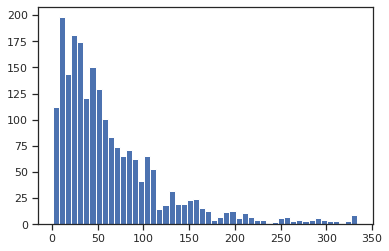

In [64]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['training_hours']])
plt.hist(data['training_hours'], 50)
plt.show()

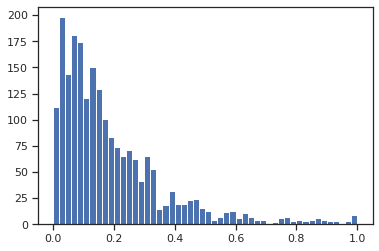

In [65]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

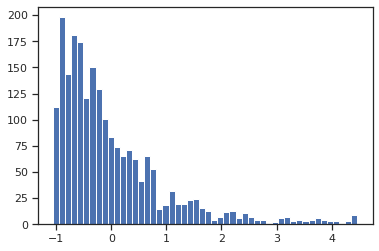

In [66]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['training_hours']])
plt.hist(sc2_data, 50)
plt.show()